In [15]:
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

iris = datasets.load_iris()

In [16]:
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3)

In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(X=x_train,y=y_train)
print("train",clf.score(x_train,y_train))
print("test",clf.score(x_test,y_test))

train 0.9714285714285714
test 0.9111111111111111


In [18]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini',max_depth=3).fit(X=x_train,y=y_train)

print("train",clf_gini.score(x_train,y_train))
print("test",clf_gini.score(x_test,y_test))

train 0.9714285714285714
test 0.9111111111111111


In [19]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.70
|   |--- class: 0
|--- feature_3 >  0.70
|   |--- feature_2 <= 4.85
|   |   |--- feature_0 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_0 >  4.95
|   |   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- feature_3 <= 1.75
|   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



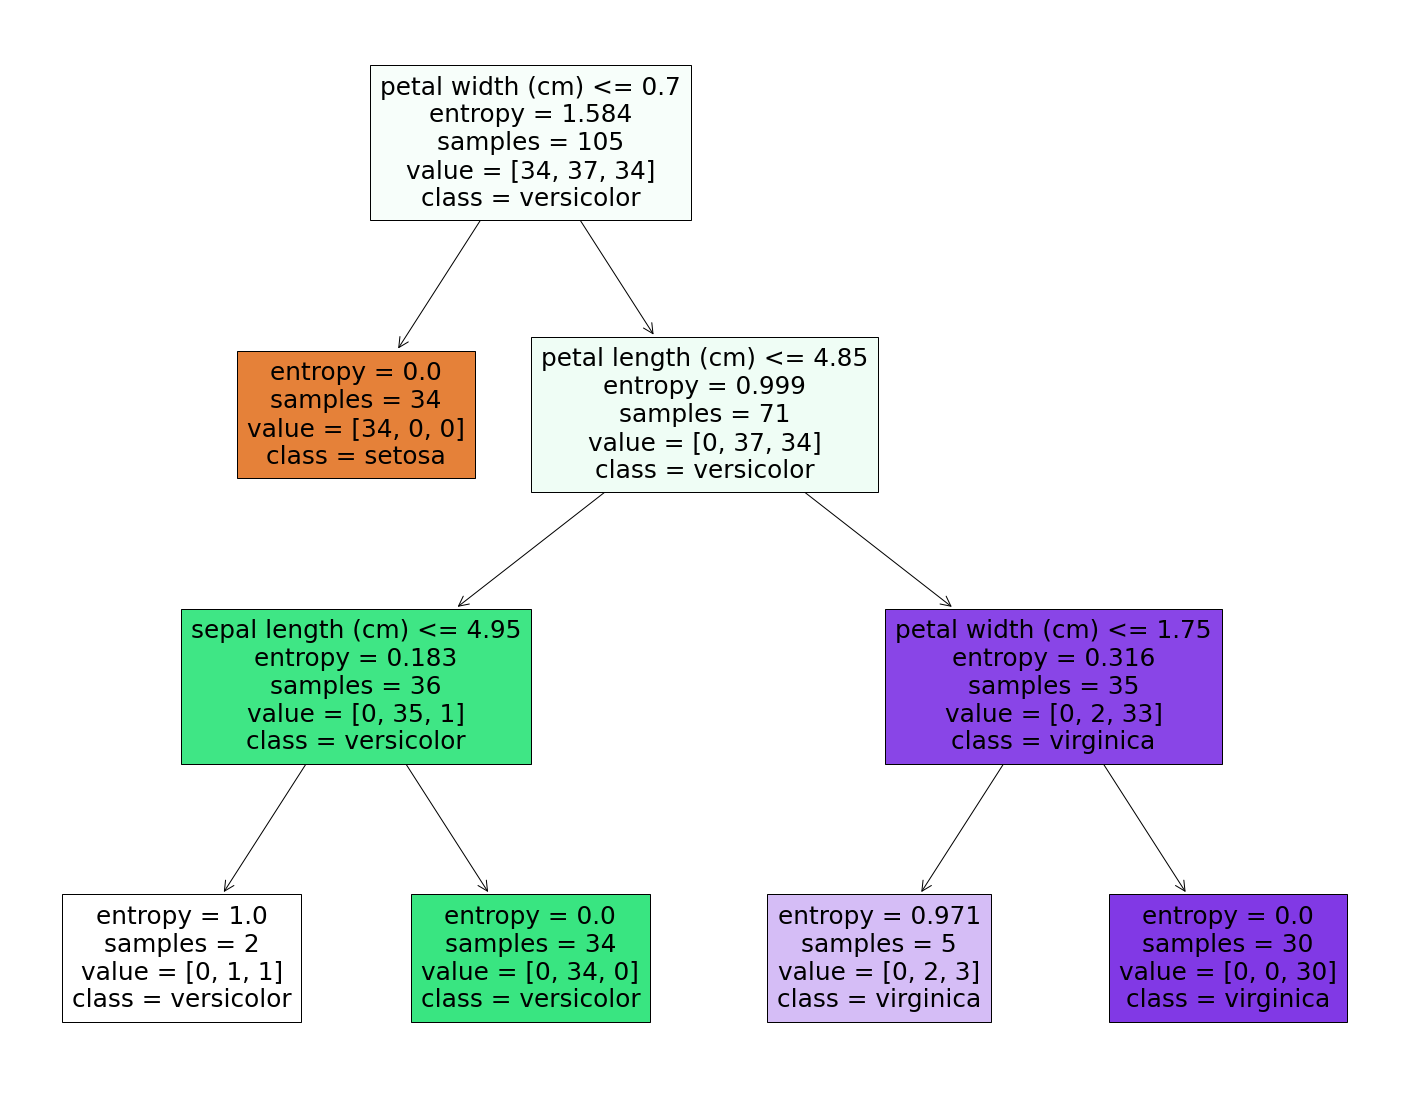

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    clf, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,
    filled=True
)


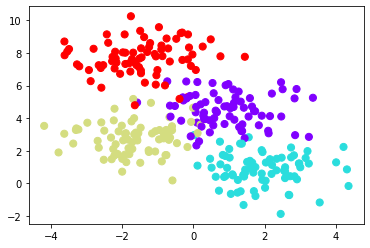

In [30]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
# X[:, 0] 二維陣列 取第一欄
# X[:, 1] 二維陣列 取第二欄          
# plt.scatter 分散點狀圖                   
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

C:\Users\adamw\AppData\Local\Temp\ipykernel_18056\2327916866.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  ax.contourf(xx, yy, Z, alpha=0.3,


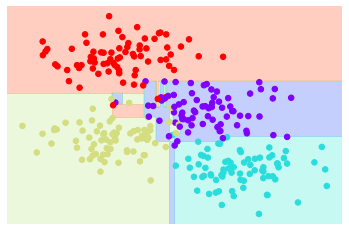

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(DecisionTreeClassifier(), X, y)